In [1]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import re
from statannot import add_stat_annotation

In [2]:
PX_SIZE_UM = 1.6

In [3]:
def load_dataset(csv_path='stats.csv', data_path='/Volumes/Multicell/Sebastien/mESC_aggregates/SUMO/Cell_number/14022020_SUMO-number/D*/*stats.csv'):
    if os.path.exists(csv_path):
        dfs_all = pd.read_csv(csv_path, index_col=0)
        print('Loaded `stats.csv`')
    else:
        print('Loading raw data')
        paths = sorted(glob(data_path))
        assert len(paths) == 31, 'Data not found'
        print('Found 31 datasets')
        
        r = re.compile(r'D(\d)/(\S*)_stats.csv')
        labels = [r.findall(p)[0] for p in paths]
        print(f'Labels: {labels}')
        
        dfs = []
        for path, l in zip(paths, labels):
            try:
                df = pd.read_csv(path, index_col=0)
                df['cell_number'] = l[1]
                df['day'] = l[0]
                dfs.append(df)
            except UnicodeDecodeError:
                print(f'bad file {path}')
        dfs_all = pd.concat(dfs)
        print('concatenate 31 datasets')
        dfs_all['major_axis_length_um'] = dfs_all.major_axis_length * PX_SIZE_UM
        dfs_all = dfs_all[dfs_all.cell_number != '300+cond001']
        dfs_all.to_csv(csv_path)
        print(f'Saved to {csv_path}')
        
    return dfs_all


In [4]:
dfs_all = load_dataset()

Loaded `stats.csv`


In [24]:
dfs_all.index = dfs_all.cell_number

In [35]:
dfs_no_cond = dfs_all[['+' not in x  for x in dfs_all.cell_number]]

In [5]:
cell_nums = dfs_all.cell_number.unique()
cell_nums

array(['100+cond', '100', '200+cond', '200', '300+cond', '300'],
      dtype=object)

In [36]:
cell_nums_no_cond = dfs_no_cond.cell_number.unique()
cell_nums_no_cond

array(['100', '200', '300'], dtype=object)

In [7]:
days = dfs_all.day.unique()
days

array([1, 4, 5, 6, 7])

In [12]:
test_params_days = dict(test='Mann-Whitney', text_format='star', loc='inside', verbose=1,
                                    box_pairs=(('100+cond', '100'),
                                               ('200+cond', '200'),
                                               ('300+cond', '300'),
#                                                ('100', '200'),
#                                                ('100', '300')
                                              )
                  )

day 1
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

100+cond v.s. 100: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.054e-01 U_stat=7.560e+02
200+cond v.s. 200: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.310e-01 U_stat=9.510e+02
300+cond v.s. 300: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.029e-01 U_stat=4.680e+02
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

100+cond v.s. 100: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.814e-01 U_stat=1.183e+03
200+cond v.s. 200: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.871e-01 U_stat=1.263e+03
300+cond v.s. 300: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correctio

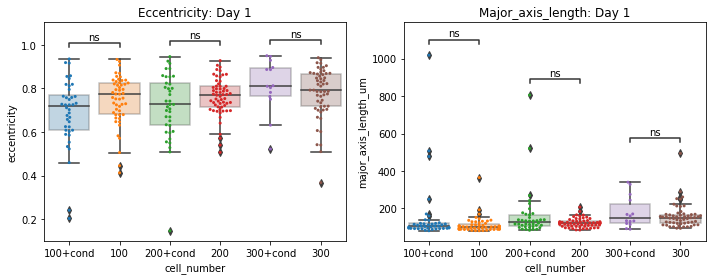

day 4
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

100+cond v.s. 100: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.485e+03
200+cond v.s. 200: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.102e+03
300+cond v.s. 300: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=4.690e+02
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

100+cond v.s. 100: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.185e-13 U_stat=2.544e+03
200+cond v.s. 200: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.719e-03 U_stat=1.690e+03
300+cond v.s. 300: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correctio

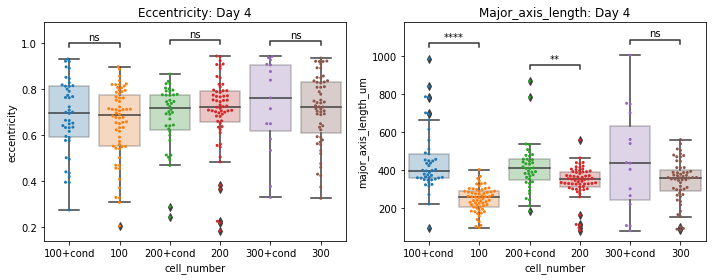

day 5
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

100+cond v.s. 100: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.550e-01 U_stat=1.165e+03
200+cond v.s. 200: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.743e-01 U_stat=9.870e+02
300+cond v.s. 300: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=3.120e+02
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

100+cond v.s. 100: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.113e-07 U_stat=2.190e+03
200+cond v.s. 200: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.054e-01 U_stat=1.404e+03
300+cond v.s. 300: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correctio

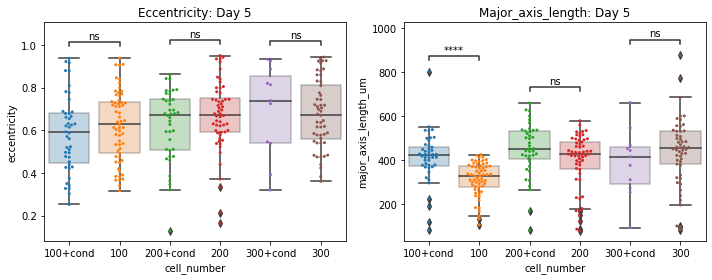

day 6
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

100+cond v.s. 100: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.193e+03
200+cond v.s. 200: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.097e+03
300+cond v.s. 300: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.615e-01 U_stat=5.540e+02
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

100+cond v.s. 100: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.568e-08 U_stat=2.126e+03
200+cond v.s. 200: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.121e+03
300+cond v.s. 300: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correctio

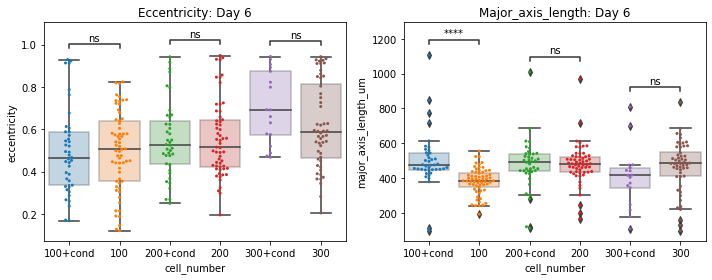

day 7
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

100+cond v.s. 100: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.738e-01 U_stat=1.384e+03
200+cond v.s. 200: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.037e+03
300+cond v.s. 300: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=4.570e+02
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

100+cond v.s. 100: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.829e-03 U_stat=1.540e+03
200+cond v.s. 200: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.018e+03
300+cond v.s. 300: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correctio

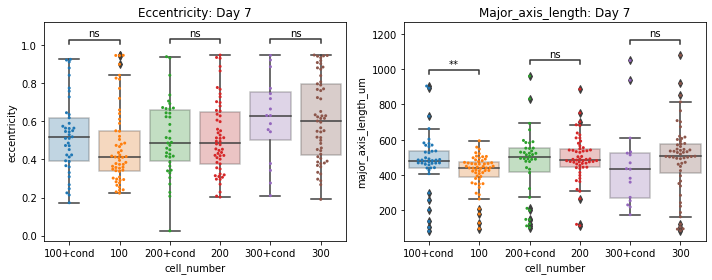

In [14]:
for day in days:
    print(f'day {day}')
    fig, ax = plt.subplots(ncols=2, figsize=(10,4))
    df = dfs_all[dfs_all.day == day]
    sns.swarmplot(data=df, x='cell_number', y='eccentricity', ax=ax[0], size=3)
    sns.boxplot(data=df, x='cell_number', y='eccentricity', boxprops=dict(alpha=.3), ax=ax[0])
    ax[0].set_title(f'Eccentricity: Day {day}')
    
    stats_ecc = add_stat_annotation(data=df, x='cell_number', y='eccentricity', ax=ax[0], **test_params_days)

    sns.swarmplot(data=df, x='cell_number', y='major_axis_length_um', ax=ax[1], size=3)
    sns.boxplot(data=df, x='cell_number', y='major_axis_length_um', boxprops=dict(alpha=.3), ax=ax[1])
    ax[1].set_title(f'Major_axis_length: Day {day}')
    
    
    stats_mal = add_stat_annotation(data=df, x='cell_number', y='major_axis_length_um', ax=ax[1], **test_params_days)

    plt.tight_layout()
    plt.show()

cell num 100+cond
Day 5: 8 long cells out of total 46 (17%)


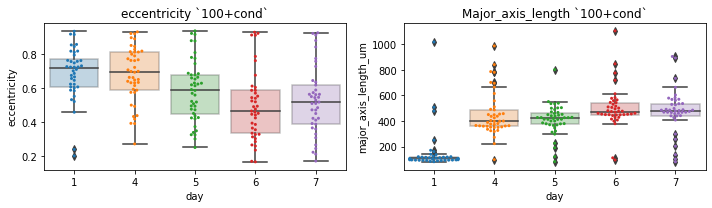

cell num 100
Day 5: 14 long cells out of total 63 (22%)


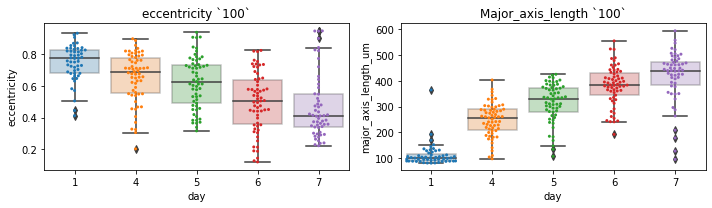

cell num 200+cond
Day 5: 9 long cells out of total 40 (22%)


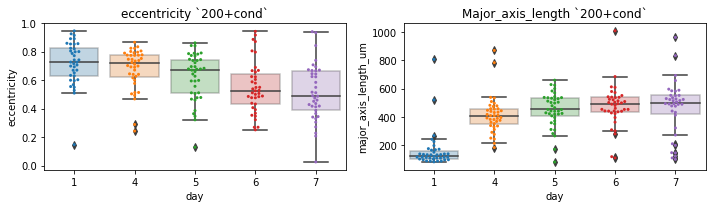

cell num 200
Day 5: 14 long cells out of total 61 (23%)


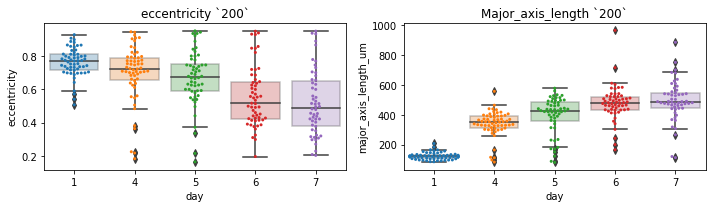

cell num 300+cond
Day 5: 5 long cells out of total 19 (26%)


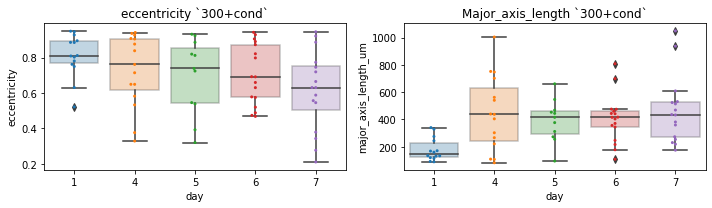

cell num 300
Day 5: 16 long cells out of total 58 (28%)


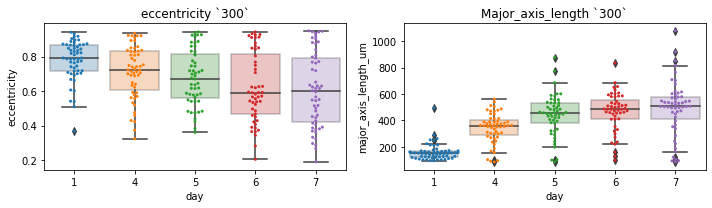

In [61]:
for cell_num in cell_nums:
    print(f'cell num {cell_num}')
    fig, ax = plt.subplots(ncols=2, figsize=(10,3))
    df = dfs_all[dfs_all.cell_number == cell_num]
    sns.swarmplot(data=df, x='day', y='eccentricity', ax=ax[0], size=3)
    sns.boxplot(data=df, x='day', y='eccentricity', boxprops=dict(alpha=.3), ax=ax[0])
    ax[0].set_title(f'eccentricity `{cell_num}`')
    
    dff = df[df.day == 5]
    print(f'Day 5: {(longs := len(dff[dff.eccentricity > 0.75]))} long cells out of total {(tot := len(dff))} ({longs/tot:.0%})')

    sns.swarmplot(data=df, x='day', y='major_axis_length_um', ax=ax[1], size=3)
    sns.boxplot(data=df, x='day', y='major_axis_length_um', boxprops=dict(alpha=.3), ax=ax[1])
    ax[1].set_title(f'Major_axis_length `{cell_num}`')

    plt.tight_layout()
    plt.show()

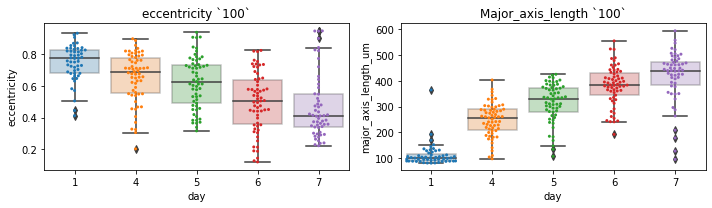

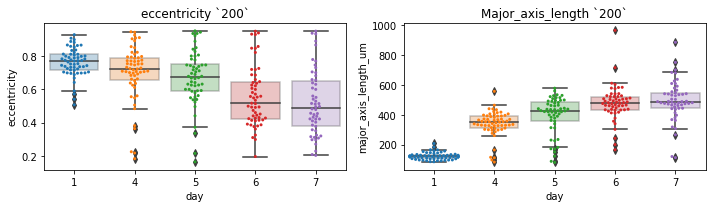

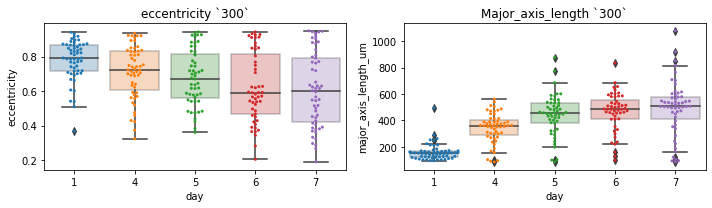

In [53]:
for cell_num in cell_nums_no_cond:
#     print(f'cell num {cell_num}')
    fig, ax = plt.subplots(ncols=2, figsize=(10,3))
    df = dfs_all[dfs_all.cell_number == cell_num]
    sns.swarmplot(data=df, x='day', y='eccentricity', ax=ax[0], size=3)
    sns.boxplot(data=df, x='day', y='eccentricity', boxprops=dict(alpha=.3), ax=ax[0])
    ax[0].set_title(f'eccentricity `{cell_num}`')

    sns.swarmplot(data=df, x='day', y='major_axis_length_um', ax=ax[1], size=3)
    sns.boxplot(data=df, x='day', y='major_axis_length_um', boxprops=dict(alpha=.3), ax=ax[1])
    ax[1].set_title(f'Major_axis_length `{cell_num}`')

    plt.tight_layout()
    plt.show()

In [ ]:
for cell_num in cell_nums_no_cond:
#     print(f'cell num {cell_num}')
    fig, ax = plt.subplots(ncols=2, figsize=(10,3))
    df = dfs_all[dfs_all.cell_number == cell_num]
    sns.swarmplot(data=df, x='day', y='eccentricity', ax=ax[0], size=3)
    sns.boxplot(data=df, x='day', y='eccentricity', boxprops=dict(alpha=.3), ax=ax[0])
    ax[0].set_title(f'eccentricity `{cell_num}`')

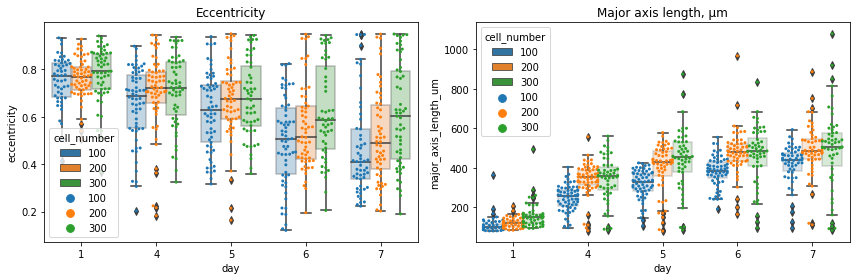

In [58]:
fig, ax = plt.subplots(1,2, figsize=(12,4), facecolor='w')
sns.swarmplot(ax=ax[0], data=dfs_no_cond, x='day', y='eccentricity', hue='cell_number', size=3, dodge=True)
sns.boxplot(ax=ax[0], data=dfs_no_cond, x='day', y='eccentricity', hue='cell_number', boxprops=dict(alpha=.3), dodge=True)
ax[0].set_title('Eccentricity')

sns.swarmplot(ax=ax[1], data=dfs_no_cond, x='day', y='major_axis_length_um', hue='cell_number', size=3, dodge=True)
sns.boxplot(ax=ax[1], data=dfs_no_cond, x='day', y='major_axis_length_um', hue='cell_number', boxprops=dict(alpha=.2), dodge=True)
ax[1].set_title('Major axis length, μm')
plt.tight_layout()


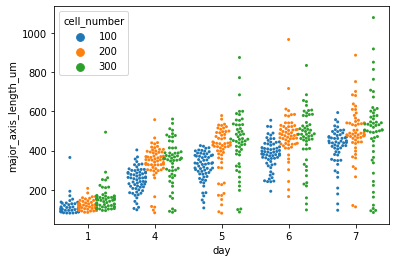

In [45]:

sns.swarmplot(data=dfs_no_cond, x='day', y='major_axis_length_um', hue='cell_number', size=3, dodge=True)

In [20]:
dfs_all.head()

,well_index,area,eccentricity,major_axis_length,cell_number,day,major_axis_length_um
0,0,NaN,NaN,NaN,100+cond,1,NaN
1,1,2649.0,0.762921,72.745863,100+cond,1,116.393380
2,2,2231.0,0.608107,60.303620,100+cond,1,96.485792
3,3,1928.0,0.731825,61.625543,100+cond,1,98.600869
4,4,2483.0,0.845136,77.162176,100+cond,1,123.459481


Text(0.5, 1.0, 'Major axis length, um')

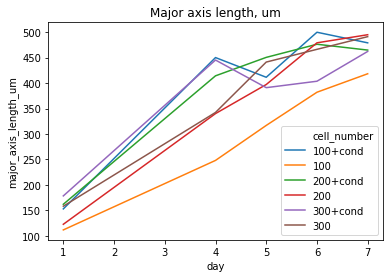

In [38]:
sns.lineplot(x='day', y='major_axis_length_um', hue='cell_number',data=dfs_all, ci=None)
plt.title('Major axis length, um')

Text(0.5, 1.0, 'Eccentricity')

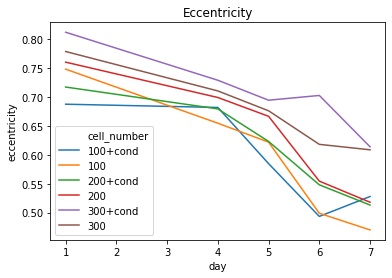

In [16]:
sns.lineplot(x='day', y='eccentricity', hue='cell_number',data=dfs_all, ci=None)
plt.title('Eccentricity')

Text(0.5, 1.0, 'Eccentricity')

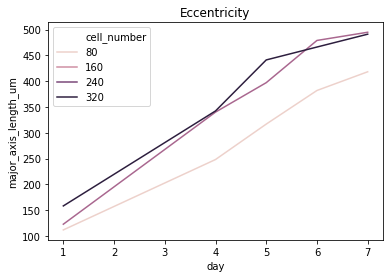

In [39]:
sns.lineplot(x='day', y='major_axis_length_um', hue='cell_number',data=dfs_no_cond, ci=None)
plt.title('Eccentricity')

Text(0.5, 1.0, 'Eccentricity')

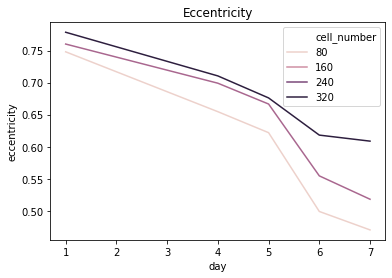

In [37]:
sns.lineplot(x='day', y='eccentricity', hue='cell_number',data=dfs_no_cond, ci=None)
plt.title('Eccentricity')

In [40]:
dfs_no_cond.dtypes

well_index                int64
area                    float64
eccentricity            float64
major_axis_length       float64
cell_number              object
day                       int64
major_axis_length_um    float64
dtype: object